In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import sys
sys.path.append("..")

import jax
import jax.numpy as jnp
import flax.linen as nn
from tqdm import tqdm

import optuna

import polars as pl
import numpy as np
import matplotlib.pyplot as plt

from herec.utils import *
from herec.loader import *
from herec.reader import *
from herec.model import *

/home/sugahara/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Experiment Name: ML100K-HE_MF-TRAIN
Experiment ID: 81
(100, 3)


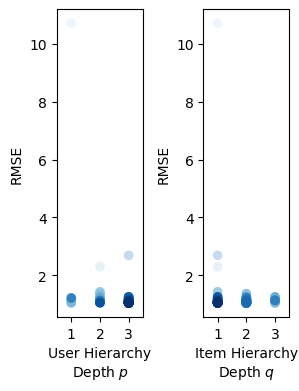

Experiment Name: ML1M-HE_MF-TRAIN
Experiment ID: 88
(100, 3)


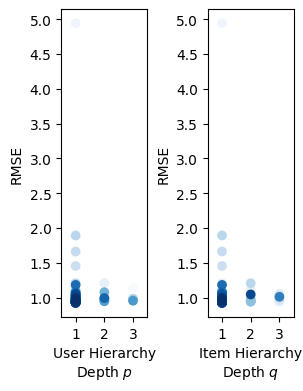

Experiment Name: Ciao-HE_MF-TRAIN
Experiment ID: 130
(100, 3)


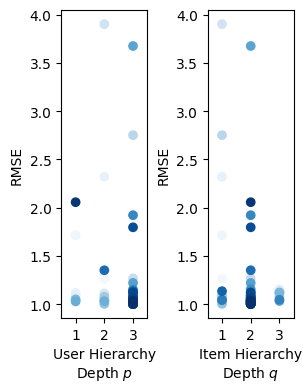

Experiment Name: Ciao_PART-HE_MF-TRAIN
Experiment ID: 92
(100, 3)


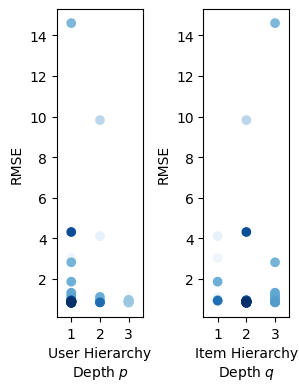

Experiment Name: Yelp-HE_MF-TRAIN
Experiment ID: 164
(100, 3)


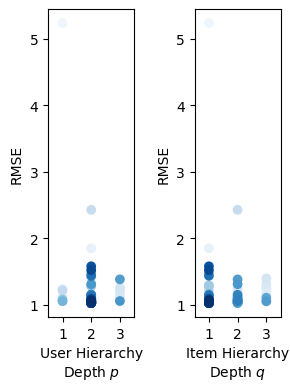

In [3]:
for datasetName in ["ML100K", "ML1M", "Ciao", "Ciao_PART", "Yelp"]:
    for modelName in ["HE_MF"]:
        for seed in range(1):

            ## Load
            
            loader = resultLoader(f"{datasetName}-{modelName}-TRAIN")
            df_RESULT = loader.get_results_by_fold(seed)
            df_RESULT = df_RESULT.sort("start_time").select(np.sqrt(pl.col("metrics.VALID_LOSS")).alias("RMSE"), pl.col("params.userHierarchyDepth").cast(int), pl.col("params.itemHierarchyDepth").cast(int))
            print(df_RESULT.shape)
            
            ## Plot
            
            fig, axes = plt.subplots(1, 2, figsize=(3, 4))
            plt.subplots_adjust(wspace=0.7)
            
            values = axes[0].scatter( df_RESULT["params.userHierarchyDepth"], df_RESULT["RMSE"], c=range(100), cmap='Blues' )
            values = axes[1].scatter( df_RESULT["params.itemHierarchyDepth"], df_RESULT["RMSE"], c=range(100), cmap='Blues' )
            
            axes[0].set_xlabel("User Hierarchy\nDepth $p$")
            axes[1].set_xlabel("Item Hierarchy\nDepth $q$")
            axes[0].set_ylabel("RMSE")
            axes[1].set_ylabel("RMSE")
            axes[0].set_xlim([0.5, 3.5])
            axes[1].set_xlim([0.5, 3.5])

            plt.savefig(f"RATING_{datasetName}.pdf", bbox_inches="tight")
            plt.show()

Experiment Name: ML100K_IMPLICIT-HE_MF_BPR-TRAIN
Experiment ID: 101
(100, 3)


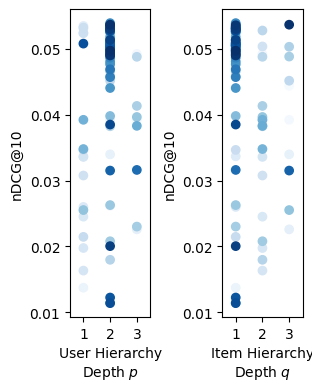

Experiment Name: ML1M_IMPLICIT-HE_MF_BPR-TRAIN
Experiment ID: 110
(100, 3)


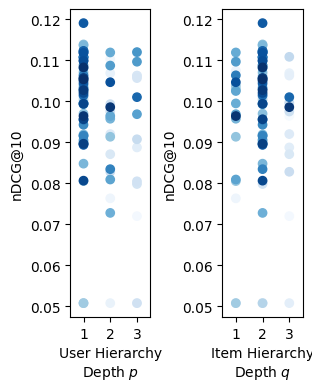

Experiment Name: Twitch100K-HE_MF_BPR-TRAIN
Experiment ID: 201
(100, 3)


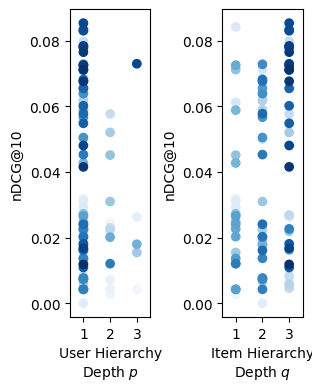

Experiment Name: FourSquare-HE_MF_BPR-TRAIN
Experiment ID: 242
(100, 3)


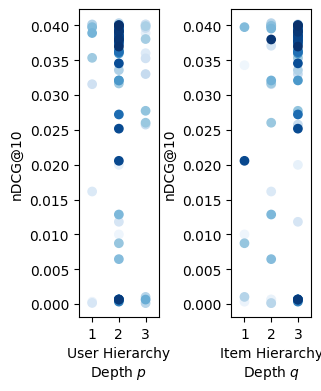

In [4]:
for datasetName in ["ML100K_IMPLICIT", "ML1M_IMPLICIT", "Twitch100K", "FourSquare"]:
    for modelName in ["HE_MF_BPR"]:
        for seed in range(1):

            ## Load
            
            loader = resultLoader(f"{datasetName}-{modelName}-TRAIN")
            df_RESULT = loader.get_results_by_fold(seed)
            df_RESULT = df_RESULT.sort("start_time").select("metrics.nDCG_10", pl.col("params.userHierarchyDepth").cast(int), pl.col("params.itemHierarchyDepth").cast(int))
            print(df_RESULT.shape)
            
            ## Plot
            
            fig, axes = plt.subplots(1, 2, figsize=(3, 4))
            plt.subplots_adjust(wspace=0.9)
            
            values = axes[0].scatter( df_RESULT["params.userHierarchyDepth"], df_RESULT["metrics.nDCG_10"], c=range(100), cmap='Blues' )
            values = axes[1].scatter( df_RESULT["params.itemHierarchyDepth"], df_RESULT["metrics.nDCG_10"], c=range(100), cmap='Blues' )
            
            axes[0].set_xlabel("User Hierarchy\nDepth $p$")
            axes[1].set_xlabel("Item Hierarchy\nDepth $q$")
            axes[0].set_ylabel("nDCG@10")
            axes[1].set_ylabel("nDCG@10")
            axes[0].set_xlim([0.5, 3.5])
            axes[1].set_xlim([0.5, 3.5])

            plt.savefig(f"RANKING_{datasetName}.pdf", bbox_inches="tight")
            plt.show()